<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# Sesión 4. Ejemplo de aprendizaje supervisado: clasificación.

## *Clasificación binaria de precios de electricidad en el Mercado Diario.*

**Objetivo:** predecir en qué horas el precio de la electricidad en el Mercado Diario será elevado, siendo la **clase 0** para valores menores al cuartil superior Q3, y **clase 1** para valores mayores al cuartil superior Q3 (precio electricidad > Q3 = 59 €/MWh).  Se utilizarán datos históricos de la variable target que queremos clasificar y de otros atributos (features) que pueden ayudar a predecir modelo.


**Contexto:** Una empresa que compre energía directamente en el mercado diario, quiere conocer el día anterior en que franjas horarias del dia siguiente el coste de la electricidad va a ser excesivamente elevado. Así pueden re-organizar (si es pobible) el consumo de las cargas o descargar baterías durante esas horas, reduciendo el coste de la factura eléctrica.

### Antes de empezar:

* En el archivo **S4_ejemplo.csv** se encuentra el conjunto de datos de entrada de este ejemplo (atributos + etiqueta). 


## **1. Importar librerías y datos**


In [2]:
# Importamos las librerías
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargamos el conjunto de datos de entrada
dataset = pd.read_csv('Data/S4_ejemplo.csv', delimiter=';')

## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. ¿Qué significan?
3. ¿Falta algún dato?
4. ¿Están balanceadas las etiquetas? 
4. Resumen estadístico del conjunto de datos de entrada.

**1. ¿Cuántos datos hay?**  Hay 21551 filas y 10 columnas en total.  **¿Cuántos atributos hay en los datos?** Existen 9 atrubutos y 1 etiqueta (lo que queremos clasificar).

In [32]:
# Filasxcolumnas de los datos
dataset.shape


(21551, 10)

In [29]:
# Observa las primeras 5 filas de datos
dataset.head()

,Hora,Mes,Hidraul,Eolica,Demanda,Ciclocomb,Cogener,Nuclear,Carbon,Clases
0,0,1,1061.0,12613.0,19596.0,1322.6,2099.9,7101.5,773.0,0
1,1,1,1073.0,11423.1,18027.1,1322.6,2087.4,7102.5,772.0,0
2,2,1,932.8,11052.1,17202.5,1322.6,2124.9,7102.5,701.0,0
3,3,1,889.7,8176.0,16788.2,1149.6,2123.0,7102.5,521.0,0
4,4,1,869.6,7748.0,16438.7,1149.6,2119.8,7102.5,521.0,0


In [5]:
# Observa las últimas 5 filas de datos
dataset.tail()

,Hora,Mes,Hidraul,Eolica,Demanda,Ciclocomb,Cogener,Nuclear,Carbon,Clases
21546,19,6,1867.8,7577.2,20392.4,4808.0,3307.3,4818.7,423.0,0
21547,20,6,2445.6,7229.4,19657.0,5438.9,3319.9,4818.7,423.0,0
21548,21,6,2647.0,6403.7,18653.7,4824.0,3318.8,4820.7,423.0,0
21549,22,6,2574.5,5808.8,18284.9,4788.8,3311.8,4821.7,423.0,0
21550,23,6,1767.0,5544.1,17126.2,4166.0,3302.0,4822.7,423.0,0


**2. ¿Qué significan?** 
* ***[Hora, Mes]*** Hora y mes de cada una de las observaciones. Son valores enteros *int64*.

* ***[Hidraul, Eolica, Ciclocomb, Cogener, Nuclear, Carbon]*** se refiere a la energía programada horaria en el mercado diario por tipo de producción.  Son valores reales *float*.

* ***[Demanda]*** es la totalidad de energía programada en el mercado diario eléctrico en España.  Son valores reales *float*.

* ***[Clases]*** son las etiquetas de precio que queremos predecir. Son valores enteros *int64*.




In [6]:
# Formato de los datos
dataset.dtypes

Hora           int64
Mes            int64
Hidraul      float64
Eolica       float64
Demanda      float64
Ciclocomb    float64
Cogener      float64
Nuclear      float64
Carbon       float64
Clases         int64
dtype: object

**3. ¿Falta algún dato?** Se comprueba si falta algún dato, y de ser así, se realiza el recuento de celdas vacías en cada atributo. En este caso, no falta ningún dato en el conjunto de datos de entrada (no existen valores *Nan*).

In [7]:
# Comprobar si falta algún dato y en qué atributo
dataset.isna().sum()

Hora         0
Mes          0
Hidraul      0
Eolica       0
Demanda      0
Ciclocomb    0
Cogener      0
Nuclear      0
Carbon       0
Clases       0
dtype: int64

**4. ¿Están balanceadas las etiquetas?** Existe un desbalance de las etiquetas. La etiqueta 0 abarca un 74% de las muestras, mientras que la 1, un 26%. 

In [8]:
# Comprobar si las etiquetas están desvalanceadas
dataset['Clases'].value_counts()

0    16165
1     5386
Name: Clases, dtype: int64

**5. Resumen estadístico del conjunto de datos de entrada:** La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [9]:
# Datos estadísticos de cada uno de los atributos
dataset.describe()

,Hora,Mes,Hidraul,Eolica,Demanda,Ciclocomb,Cogener,Nuclear,Carbon,Clases
count,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000,21551.000000
mean,11.500441,5.921721,2688.799629,6217.348364,21068.828235,2918.136193,3293.181746,6207.869858,1954.463320,0.249919
std,6.922205,3.426720,1566.705309,3398.182648,3709.090479,2647.884985,286.246492,931.505669,1916.907903,0.432976
min,0.000000,1.000000,276.200000,515.900000,11950.400000,157.000000,1825.500000,3410.200000,0.000000,0.000000
25%,6.000000,3.000000,1416.100000,3581.500000,18119.750000,1090.950000,3126.300000,5483.350000,545.000000,0.000000
50%,12.000000,5.000000,2324.100000,5543.500000,20966.000000,1776.300000,3325.300000,6477.500000,993.000000,0.000000
75%,17.500000,9.000000,3732.250000,8296.100000,23816.450000,3976.400000,3493.000000,7028.000000,3190.250000,0.000000
max,23.000000,12.000000,8504.300000,18996.300000,35458.900000,13789.200000,3936.100000,7115.400000,7465.100000,1.000000


## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots
4. Matriz de correlación


**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

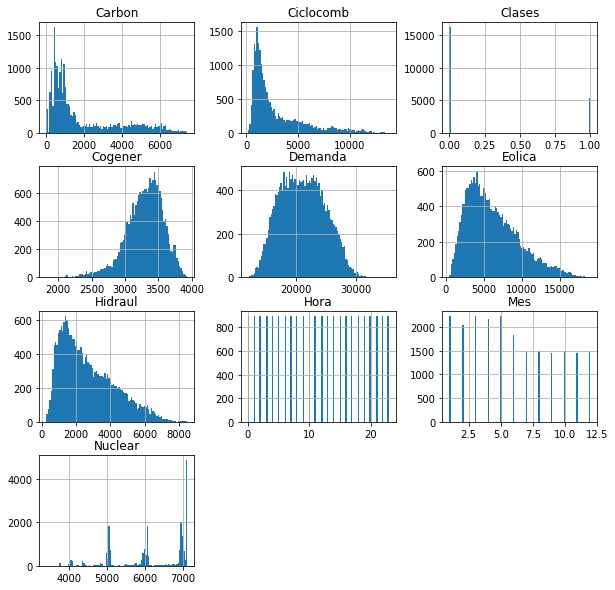

In [10]:
histograma = dataset.hist(xlabelsize=10, ylabelsize=10, bins=100, figsize=(10, 10))

**2. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

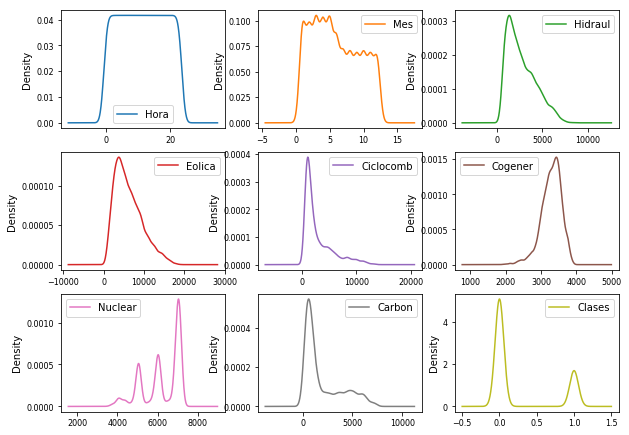

In [11]:
density = dataset.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 3), figsize=(10, 10), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja). 

En este caso, los outliers aportan bastante información, como por ejemplo un dia sin viento, que provoca un aumento considerable de la energía térmica de carbón. 

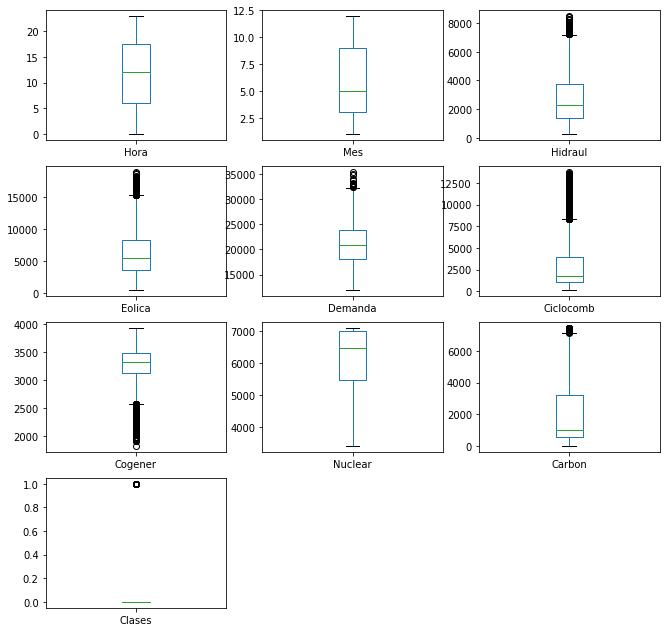

In [12]:
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False,
                                 sharey=False, fontsize=10)

**¿Cómo ha cambiado la distribución de las fuentes de generación en el último año?** 

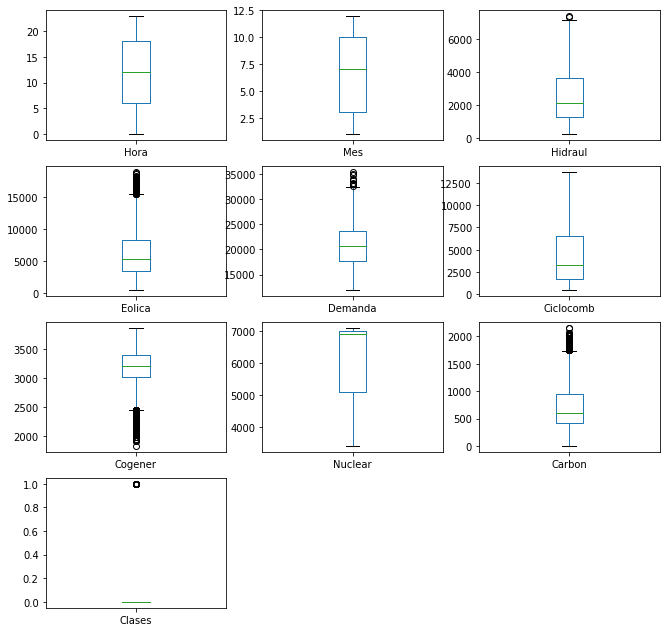

In [14]:
atributos_boxplot = dataset[12910:].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False,
                                 sharey=False, fontsize=10)

**4. Matriz de correlación** 

Tabla de doble entrada de los atributos

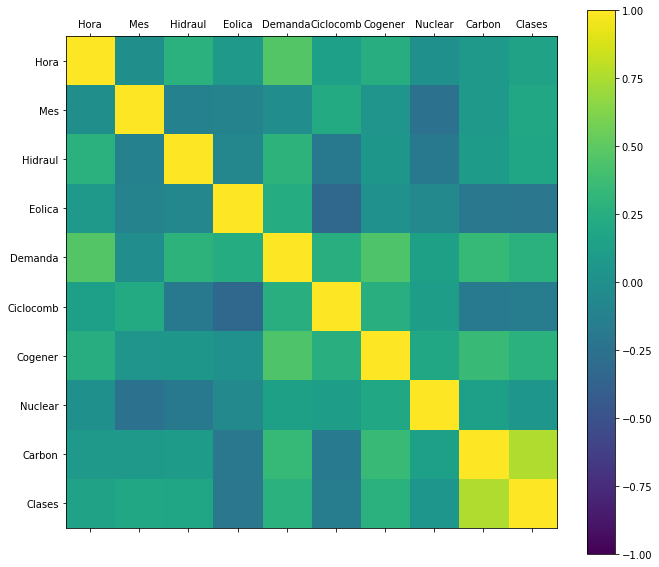

In [15]:
# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='pearson') 

# Matriz de correlación
fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.show()


## *4. Preparar los datos*

1. Limpieza de datos (data cleaning)
2. Transformación

Primero, divido los datos en **atributos**: X (features) y **etiquetas**: y (target)

In [16]:
# Atributos X (features); etiquetas y (target)
X = dataset.drop(['Clases'], axis=1) 
y = dataset['Clases']

**1. Limpieza de datos (data cleaning)**

No exisiten Nan en los datos de entrada y no se eliminarán los outliers en este ejemplo. Esto se tratará en la práctica. 



**2. Transformación**. 

Se escalan los datos utilizando el método de *MinMaxScaler()*, que escala y traduce cada atributo individualmente de tal manera que está dentro del rango [0,1]. Esto es necesario hacerlo cuando las escalas de los atributos son diferentes (eg. mes [0, 11], eólica [515.5, 18996.3])

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = X.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
X_scaled.columns = df_scaled.columns
X_scaled.head()

,Hora,Mes,Hidraul,Eolica,Demanda,Ciclocomb,Cogener,Nuclear,Carbon
0,0.000000,0.0,0.095380,0.654591,0.325227,0.085503,0.130010,0.996249,0.103549
1,0.043478,0.0,0.096839,0.590204,0.258489,0.085503,0.124088,0.996518,0.103415
2,0.086957,0.0,0.079800,0.570128,0.223413,0.085503,0.141855,0.996518,0.093904
3,0.130435,0.0,0.074562,0.414499,0.205789,0.072813,0.140955,0.996518,0.069791
4,0.173913,0.0,0.072119,0.391339,0.190922,0.072813,0.139439,0.996518,0.069791


## *5. Dividir los datos*

Se utiliza la semilla ***randome_state=0*** para todos los ejercicios. ***Suffle=True*** indica que los datos se reparten de forma aleatoria entre entreno y prueba. Esto reduce la varianza y evita que el modelo no cree un sobreajuste (overfitting). 

In [18]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # porcentaje de los datos de entrada que utilizaré para validar el modelo

# Divido los datos en datos de entreno, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=0,
                                                    shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0,
                                                    shuffle=True)

## *6. Construcción y evaluación de modelos*

* La métrica de evaluacion seleccionada es **balanced_accuracy**. En los problemas de clasificación binaria sirve para evaluar a los conjuntos de datos desequilibrados. Se define como el promedio de **Recall** obtenido de cada clase.
* Se evaluan los siguientes algoritmos: 
    * **Logistic Regression** *LogisticRegression()*
    * **Support Vector Machine** Classifier *SVC()*
    * **K-nearest neighbors Classifier** *KNeighborsClassifier()*
    * **Decision Tree Classifier** *DecisionTreeClassifier()*

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

num_folds = 5
error_metrics = {'balanced_accuracy'}
models = {('LR', LogisticRegression()), ('SVC', SVC()), ('KNN', KNeighborsClassifier()),
           ('DTC', DecisionTreeClassifier())}

results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation


Se entrenan cada uno de los modelos, se guarda su resultado y se comparan gráficamente. El que mejor resultado da es el **KNN**, ya que su balanced_accuracy es la más alta y su desviación típica es menor (más preciso).

Métrica de evaluación:  balanced_accuracy
Modelo  LR
Modelo  DTC
Modelo  KNN
Modelo  SVC
[('LR', 0.8663782393428766, 0.007829785667330523), ('DTC', 0.9314418820473247, 0.005336903488914106), ('KNN', 0.9328957869488272, 0.00522752577398162), ('SVC', 0.9083425864391146, 0.0065441715939557376), ('LR', 0.8663782393428766, 0.007829785667330523), ('DTC', 0.9312764683304472, 0.0055870815298901646), ('KNN', 0.9328957869488272, 0.00522752577398162), ('SVC', 0.9083425864391146, 0.0065441715939557376)]


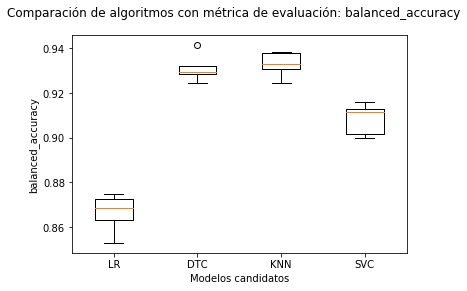

In [33]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Entreno con validación cruzada
for scoring in error_metrics:
    print('Métrica de evaluación: ', scoring)
    for name, model in models:
        print('Modelo ', name)
        cross_validation = KFold(n_splits=num_folds, shuffle=True, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    fig = plt.figure()
    fig.suptitle('Comparación de algoritmos con métrica de evaluación: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Modelos candidatos')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []


## *7. Ajustar hiperparámetros*

Pasos para realizar el hiperajuste de los parámetros:
* Especificar el modelo a ajustar: *KNeighborsClassifier()*
* Especificar una métrica para optimizar: *balanced_accuracy*
* Definir los rangos de los parámetros de búsqueda: *params*
* Asignar un método de validación: *KFold*
* Entrenar con los datos de validación: *X_val*

In [34]:
#KNeighborsRegressor

modelo = KNeighborsClassifier()
scoring='balanced_accuracy'
params = {
     'n_neighbors': [5, 20, 50], #default=5
     'weights': ['uniform','distance'], #'uniform','distance'
     'leaf_size': [30,40], #default=30
     'p': [2,6], #default=2
 }

# Búsqueda de la mejor combinación de hiperparámetros
cross_validation = KFold(n_splits=5, shuffle=True, random_state=0)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

# Imprimo el mejor resultado
print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

Mejor resultado: 0.912662 utilizando los siguientes hiperparámetros {'leaf_size': 30, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


## *8. Evaluación final del modelo*



Métricas de evaluación:
  * 1. Matriz de confusión
  * 2. Coeficiente de Matthews (MCC)

    
Finalmente, entreno al modelo con los hiperparámetros óptimos encontrados en el apartado anterior y realizo las predicciones. 

In [35]:

modelo_final = KNeighborsClassifier(n_neighbors=5, weights='distance', leaf_size=30, p=2)
modelo_final.fit(X_train,y_train)  # Se entrena al modelo KNN
y_predict = modelo_final.predict(X_test)  # Se calculan las predicciones



**1. Matriz de confusión**

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3232
           1       0.95      0.92      0.94      1079

    accuracy                           0.97      4311
   macro avg       0.96      0.95      0.96      4311
weighted avg       0.97      0.97      0.97      4311

[[3182   50]
 [  82  997]]


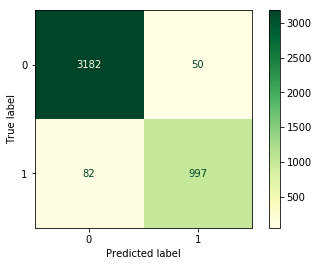

In [37]:
# Gráfico no normalizado de la martiz de confusión
disp = plot_confusion_matrix(modelo_final, X_test, y_test,
                                 cmap=plt.cm.YlGn, values_format = '')

**2. Coeficiente de Matthews (MCC)**

El MCC utiliza coeficientes de correlación entre -1 y +1. 
* Coeficiente +1 representa una predicción perfecta
* Coeficiente 0 representa una predicción media aleatoria
* Coeficiente -1 representa una predicción inversa. 

In [38]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_predict)

0.9177806247054396

## 9. Conclusiones  

* El modelo KNN tiene bastante acierto, incluso en la clase minoritaria (precios de la electricidad elevados = 1).
* El atributo que más influye en la predicción es la generación de carbón. 
* Se pueden realizar mejoras, como por ejemplo feature selection (elegir atributos con mayor peso en la clasificación), entrenar con otros algoritmos (Random Forest), comprobar si los resultados dan mejor entrenando diferentes modelos para las diferentes estaciones del año, entrenar al modelo con StratifiesShuffle, etc. 
* MCC es 0.91, lo cual indica una predicción altamente exacta y precisa. 
 